Goal of this case study is to take some stock and do some time series analysis. Essentially find the best p, d and q values for your ARIMA model.
- Talk breifly about ARIMA model
- Talk about p d q terms
- Get the stock data for JPMC

Time series forecasting can be framed as a supervised learning problem. This re-framing of time series data allows one to access the suite of standard linear and nonlinear machine learning algorithms for the problem at hand.

In [1]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
import matplotlib 
%matplotlib inline

In [2]:
from pandas_datareader import data as web

In [3]:
import datetime

In [9]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2018, 5, 31)

In [10]:
web.DataReader('JPM', 'iex', start, end)

5y


,open,high,low,close,volume
date,,,,,
2014-01-02,52.3071,52.4775,52.0061,52.2174,15637267
2014-01-03,52.2892,52.8812,52.2174,52.6211,14220320
2014-01-06,53.0696,53.3432,52.7736,52.9261,17562447
2014-01-07,53.1862,53.3118,52.1277,52.3161,17869722
2014-01-08,52.5134,52.8453,52.2981,52.8094,14694818
2014-01-09,52.9081,52.9261,52.3250,52.7108,13248583
2014-01-10,52.6300,52.7108,52.1860,52.4686,12704391
2014-01-13,52.4865,52.6300,51.6074,51.7599,20773435
2014-01-14,52.2981,52.5493,51.6343,51.7958,30318950


In [17]:
price = web.DataReader('JPM', 'iex', start, end)['close']

5y


In [18]:
price.index

Index(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07', '2014-01-08',
       '2014-01-09', '2014-01-10', '2014-01-13', '2014-01-14', '2014-01-15',
       ...
       '2018-05-17', '2018-05-18', '2018-05-21', '2018-05-22', '2018-05-23',
       '2018-05-24', '2018-05-25', '2018-05-29', '2018-05-30', '2018-05-31'],
      dtype='object', name='date', length=1111)

The pandas Index is a powerful way to handle time series data, so it is valuable to know how to build one yourself. Pandas provides the `pd.to_datetime()` function for just this task.

In [19]:
price.index = pd.to_datetime(price.index)

In [20]:
price.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2018-05-17', '2018-05-18', '2018-05-21', '2018-05-22',
               '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-29',
               '2018-05-30', '2018-05-31'],
              dtype='datetime64[ns]', name='date', length=1111, freq=None)

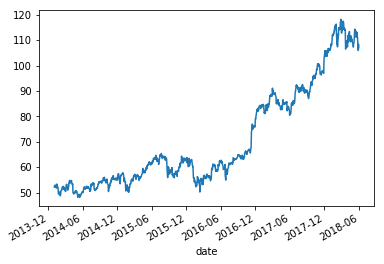

In [21]:
price.plot()

The Statsmodels library provides tools for statistical modeling. It is built upon and requires the SciPy ecosystem and supports data in the form of NumPy arrays and Pandas Series objects. It provides a suite of statistical test and modeling methods, as well as tools dedicated to time series analysis that can also be used for forecasting. Key features of Statsmodels relevant to time series forecasting include:

 - Statistical tests for stationarity such as the `Augmented Dickey-Fuller unit root test`.
 - Time series analysis plots such as `autocorrelation function (ACF)` and `partial autocorrelation function (PACF)`.
 - Linear time series models such as `autoregression (AR)`, `moving average (MA)`, `autoregressive moving average (ARMA)`, and `autoregressive integrated moving average (ARIMA)`.

Reference: http://www.statsmodels.org/stable/tsa.html

## Stationary Test

In [61]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(round(dfoutput, 3))

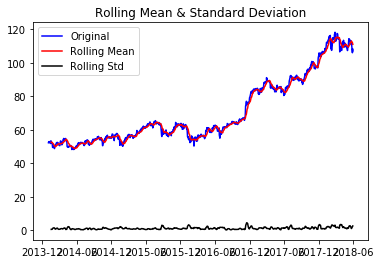

Results of Dickey-Fuller Test:
Test Statistic                    0.223
p-value                           0.974
#Lags Used                        5.000
Number of Observations Used    1105.000
Critical Value (1%)              -3.436
Critical Value (5%)              -2.864
Critical Value (10%)             -2.568
dtype: float64


In [62]:
test_stationarity(price)

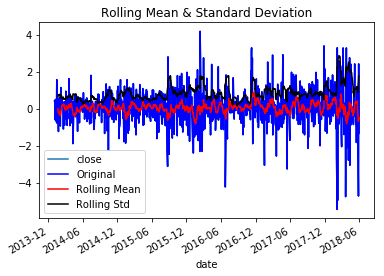

Results of Dickey-Fuller Test:
Test Statistic                  -15.924
p-value                           0.000
#Lags Used                        4.000
Number of Observations Used    1105.000
Critical Value (1%)              -3.436
Critical Value (5%)              -2.864
Critical Value (10%)             -2.568
dtype: float64


In [72]:
diff = price - price.shift()
diff.dropna(inplace=True)
diff.plot()
test_stationarity(diff)

Text(0.5,1,'Autocorrelation Function')

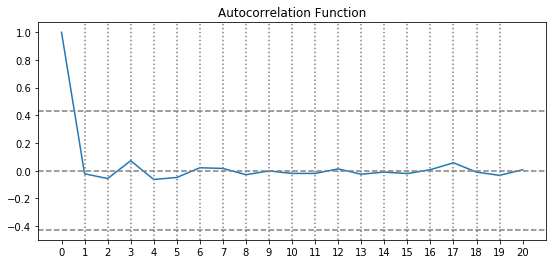

In [75]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
acf_price_plot = acf(diff, nlags=20)
#Plot ACF: 
plt.figure(figsize=(20, 4))

plt.subplot(121) 
plt.plot(acf_price_plot)
plt.xticks(np.arange(21))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(acf_price_plot)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(acf_price_plot)),linestyle='--',color='gray')
for i in range(1,20):
    plt.axvline(x=i,linestyle=':',color='gray')
plt.title('Autocorrelation Function')

In [ ]:
pacf_price_plot = pacf(diff_price_pop.dropna(), nlags=20)
#Plot ACF: 
plt.figure(figsize=(20, 4))

plt.subplot(121) 
plt.plot(pacf_air_plot)
plt.xticks(np.arange(21))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(acf_air_plot)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(acf_air_plot)),linestyle='--',color='gray')
for i in range(1,20):
    plt.axvline(x=i,linestyle=':',color='gray')
plt.title('Partial Autocorrelation Function')

## Decompose the trend

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [71]:
decomposition = seasonal_decompose(price, freq=30)

## Understanding Random Walk
To understand what a Random Walk is, lets take a look a what a random series looks like. The Python standard library contains the random module that provides access to a suite of functions for generating random numbers. The randrange() function can be used to generate a random integer between 0 and an upper limit. We can use the randrange() function to generate a list of 1,000 random integers between 0 and 10.  

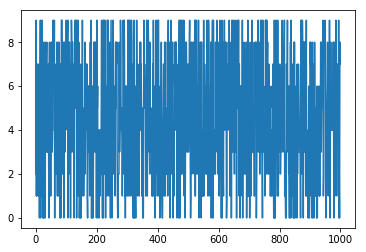

In [76]:
from random import seed
from random import randrange
seed(1)
series = [randrange(10) for i in range(1000)]
plt.plot(series)
plt.show()

Running the example plots the sequence of random numbers. It’s a real mess. It looks nothing like a time series. This is not a random walk. It is just a sequence of random numbers also called white noise. A common mistake that beginners make is to think that a random walk is a list of random numbers, and this is not the case at all.

> A random walk is different from a list of random numbers because the next value in the sequence is a modification of the previous value in the sequence. The process used to generate the series forces dependence from one-time step to the next. This dependence provides some consistency from step-to-step rather than the large jumps that a series of independent, random numbers provides. It is this dependency that gives the process its name as a random walk or a drunkard’s walk.

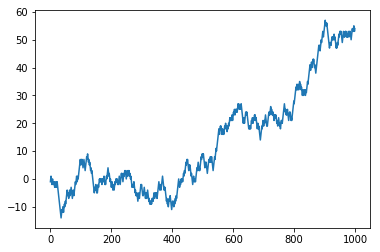

In [78]:
# create and plot a random walk
from random import seed
from random import random
from matplotlib import pyplot
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

Running the example creates a line plot of the random walk. We can see that it looks very different from our above sequence of random numbers. In fact, the shape and movement looks like a realistic time series for the price of a security on the stock market.

In the next sections, we will take a closer look at the properties of a random walk. This is helpful because it will give you context to help identify whether a time series you are analyzing in the future might be a random walk. Let’s start by looking at the autocorrelation structure.

## Random Walk and Autocorrelation
We can calculate the correlation between each observation and the observations at previous time steps. A plot of these correlations is called an autocorrelation plot or a correlogram. 

*Given the way that the random walk is constructed, we would expect a strong autocorrelation with the previous observation and **a linear fall off** from there with previous lag values. We can use the `autocorrelation plot()` function in Pandas to plot the correlogram for the random walk.*

The complete example is listed below. Note that in each example where we generate the random walk we use the same seed for the random number generator to ensure that we get the same sequence of random numbers, and in turn the same random walk.

/Users/Shravan/anaconda3/envs/casestudy1/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


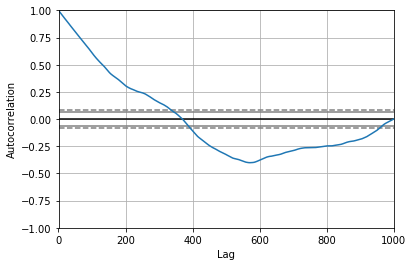

In [81]:
# plot the autocorrelation of a random walk
from random import seed
from random import random
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot

seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)
autocorrelation_plot(random_walk)
pyplot.show()

Running the example, we generally see the expected trend, in this case across the first few hundred lag observations.

## Random Walk and Stationarity
> A stationary time series is one where the values are NOT a function of time. 

Given the way that the random walk is constructed and the results of reviewing the autocorrelation, we know that the observations in a random walk are dependent on time. The current observation is a random step from the previous observation.**Therefore we can expect a random walk to be non-stationary.**. In fact, all random walk processes are non-stationary. Note that not all non-stationary time series are random walks.

> Additionally, a non-stationary time series does not have a consistent mean and/or variance over time.

A review of the random walk line plot might suggest this to be the case. We can confirm this using a statistical significance test, specifically the Augmented Dickey-Fuller test. We can perform this test using the adfuller() function in the Statsmodels library. The complete example is listed below.

In [83]:
# calculate the stationarity of a random walk
from random import seed
from random import random
from statsmodels.tsa.stattools import adfuller

# generate random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)

# statistical test
result = adfuller(random_walk) 
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


**The null hypothesis of the test is that the time series is non-stationary.** Running the example, we can see that the test statistic value was 0.341605. This is larger than all of the critical values at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does appear to be non-stationary with a low likelihood of the result being a statistical fluke.

We can make the random walk stationary by taking the first difference. That is replacing each observation as the difference between it and the previous value. Given the way that this random walk was constructed, we would expect this to result in a time series of -1 and 1 values. This is exactly what we see. The complete example is listed below.

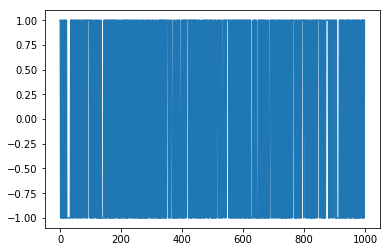

In [84]:
# calculate and plot a differenced random walk
from random import seed
from random import random
from matplotlib import pyplot

# create random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)

# take difference
diff = list()
for i in range(1, len(random_walk)):
  value = random_walk[i] - random_walk[i - 1]
  diff.append(value)
    
# line plot
pyplot.plot(diff)
pyplot.show()

Running the example produces a line plot showing 1,000 movements of -1 and 1, a real mess.

This difference graph also makes it clear that really we have no information to work with here other than a series of random moves. There is no structure to learn. Now that the time series is stationary, we can recalculate the correlogram of the differenced series. The complete example is listed below

/Users/Shravan/anaconda3/envs/casestudy1/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


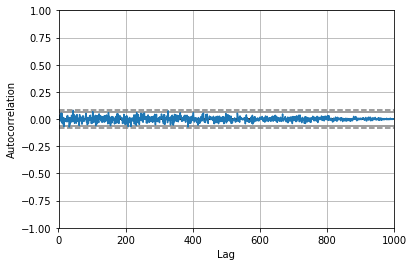

In [85]:
# plot the autocorrelation of a differenced random walk
from random import seed
from random import random
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
# create random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)
# take difference
diff = list()
for i in range(1, len(random_walk)):
  value = random_walk[i] - random_walk[i - 1]
  diff.append(value)
# line plot
autocorrelation_plot(diff)
pyplot.show()

Running the example, we can see no significant relationship between the lagged observations, as we would expect from the way the random walk was generated. All correlations are small, close to zero and below the 95% and 99% confidence levels (beyond a few statistical flukes).

## Summary of Random Walk
Is your time series a Random Walk ?

Your time series may be a random walk. Some ways to check if your time series is a random walk are as follows:
- The time series shows a strong temporal dependence that decays linearly or in a similar pattern.
- The time series is non-stationary and making it stationary shows no obviously learnable structure in the data.
- The persistence model provides the best source of reliable predictions. 

What is a persistence model ?
A random walk is unpredictable; it cannot reasonably be predicted. Given the way that the random walk is constructed, we can expect that the best prediction we could make would be to use the observation at the previous time step as what will happen in the next time step. Simply because we know that the next time step will be a function of the prior time step. This is often called the naive forecast, or a persistence model.

This last point is key for time series forecasting. Baseline forecasts with the persistence model quickly flesh out whether you can do significantly better. If you can’t, you’re probably working with a random walk. Many time series are random walks, particularly those of security prices over time. The random walk hypothesis is a theory that stock market prices are a random walk and cannot be predicted. 

## Decompose Time Series Data
Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components. Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting. 

### Time Series Components
A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.
- *Systematic*: Components of the time series that have consistency or recurrence and can be described and modeled.
- *Non-Systematic*: Components of the time series that cannot be directly modeled.

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise. These components are defined as follows:
- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

A series is thought to be an aggregate or combination of these four components. All series have a level and noise. The trend and seasonality components are optional. It is helpful to think of the components as combining either additively or multiplicatively.

There are methods to automatically decompose a time series. The Statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called `seasonal_decompose()`. It requires that you specify whether the model is additive or multiplicative. ......

## Trends
Our time series dataset may contain a trend. A trend is a continued increase or decrease in the series over time. There can be benefit in identifying, modeling, and even removing trend information from your time series dataset.

A trend is a long-term increase or decrease in the level of the time series.

> In general, a systematic change in a time series that does not appear to be periodic is known as a trend.

### Identifying a trend

You can plot time series data to see if a trend is obvious or not. The difficulty is that in practice, identifying a trend in a time series can be a subjective process. As such, extracting or removing it from the time series can be just as subjective. Create line plots of your data and inspect the plots for obvious trends. Add linear and nonlinear trend lines to your plots and see if a trend is obvious.

### Removing a trend
A time series with a trend is called non-stationary. An identified trend can be modeled. Once modeled, it can be removed from the time series dataset. This is called detrending the time series. If a dataset does not have a trend or we successfully remove the trend, the dataset is said to be trend stationary.

### Using a trend
From a machine learning perspective, a trend in your data represents two opportunities:
- Remove Information: To remove systematic information that distorts the relationship between input and output variables.
- Add Information: To add systematic information to improve the relationship between input and output variables.

Specifically, a trend can be removed from your time series data (and data in the future) as a data preparation and cleaning exercise. This is common when using statistical methods for time series forecasting, but does not always improve results when using machine learning models. Alternately, a trend can be added, either directly or as a summary, as a new input variable to the supervised learning problem to predict the output variable.

## Seasonality
Time series datasets can contain a seasonal component. This is a cycle that repeats over time, such as monthly or yearly. **This repeating cycle may obscure the signal** that we wish to model when forecasting, and in turn may provide a strong signal to our predictive models.



## Why is it called Auto Regression ?
Linear Regression can be used on time series where input variables are taken as observations at previous time steps, called lag variables. For example, we can predict the value for the next time step (t+1) given the observations at the current (t and previous t-1). As a regression model, this would look as follows:

> X(t + 1) = b0 + (b1 × X(t)) + (b2 × X(t − 1))

Because the regression model uses data from the same input variable at previous time steps, it is referred to as an autoregression (regression of self).

## What is Auto Correlation ?
An autoregression model makes an assumption that the observations at current and previous time steps are useful to predict the value at the next time step. This relationship between variables is called correlation. This relationship between variables is called correlation. If both variables change in the same direction (e.g. go up together or down together), this is called a positive correlation. If the variables move in opposite directions as values change (e.g. one goes up and one goes down), then this is called negative correlation.

We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags. 

The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling. Again, because the correlation is calculated between the variable and itself at previous time steps, it is called an `autocorrelation`. It is also called `serial correlation` because of the sequenced structure of time series data.

The correlation statistics can also help to choose which lag variables will be useful in a model and which will not. Interestingly, if all lag variables show low or no correlation with the output variable, then it suggests that the time series problem may not be predictable. This can be very useful when getting started on a new dataset.

## Auto Correlation Plots
We can plot the correlation coefficient for each lag variable.

This can very quickly give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time.

We could manually calculate the correlation values for each lag variable and plot the result. Thankfully, Pandas provides a built-in plot called the `autocorrelation_plot()` function.

#### acf plot
The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for selecting more relevant lag values.

The Statsmodels library also provides a version of the plot in the `plot_acf()` function as a line plot.


## Autoregression Model
An autoregression model is a linear regression model that uses lagged variables as input variables. 

We could calculate the linear regression model manually using the LinearRegession class in scikit-learn and manually specify the lag input variables to use. Alternately, the Statsmodels library provides an autoregression model that automatically selects an appropriate lag value using statistical tests and trains a linear regression model. It is provided in the AR class.

We can use this model by first creating the model AR() and then calling fit() to train it on our dataset. This returns an ARResult object. Once fit, we can use the model to make a prediction by calling the predict() function for a number of observations in the future.

## Moving Average
The residual errors from forecasts on a time series provide another source of information that we can model. Residual errors themselves form a time series that can have temporal structure. A simple autoregression model of this structure can be used to predict the forecast error, which in turn can be used to correct forecasts. This type of model is called a moving average model, the same name but very different from moving average smoothing. 

#### model of residual errors
The difference between what was expected and what was predicted is called the residual error. It is calculated as:
> residual error = expected − predicted

Just like the input observations themselves, the residual errors from a time series can have temporal structure like trends, bias, and seasonality.

Any temporal structure in the time series of residual forecast errors is useful as a diagnostic as it suggests information that could be incorporated into the predictive model. *An ideal model would leave no structure in the residual error, just random fluctuations that cannot be modeled.*

Structure in the residual error can also be modeled directly. There may be complex signals in the residual error that are difficult to directly incorporate into the model. Instead, you can create a model of the residual error time series and predict the expected error for your model. The predicted error can then be subtracted from the model prediction and in turn provide an additional lift in performance.

A simple and effective model of residual error is an autoregression. This is where some number of lagged error values are used to predict the error at the next time step. These lag errors are combined in a linear regression model, much like an autoregression model of the direct time series observations.

> An autoregression of the residual error time series is called a Moving Average (MA) model. This is confusing because it has nothing to do with the moving average smoothing process. Think of it as the sibling to the autoregressive (AR) process, except on lagged residual error rather than lagged raw observations.



## Autocorrelation and Partial Autocorrelation Plots
Autocorrelation and partial autocorrelation plots are heavily used in time series analysis and forecasting. These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps. 